# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Checking the number of mice.
mice_total = len(mouse_study["Mouse ID"].unique())
mice_total

249

In [75]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_id_timepoint = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [77]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = mouse_id_timepoint["Mouse ID"].unique()
mouse_duplicate = mouse_study[mouse_study["Mouse ID"].isin(mouse_id_duplicate)]

# Display the data table
mouse_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_no_duplicate = mouse_study[~mouse_study["Mouse ID"].isin(duplicate_mouse_id)]

mouse_no_duplicate.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [81]:
# Checking the number of mice in the clean DataFrame.
number_mice_no_duplicate = len(mouse_no_duplicate["Mouse ID"].unique())
number_mice_no_duplicate          


248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume', 
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev',
    'sem': 'Tumor Volume Std. Err.'})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics.head(20)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics_advanced = mouse_no_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean ='mean',
    Median ='median',
    Var ='var',
    Std ='std',
    Sem ='sem')

# Using the aggregation method, produce the same summary statistics in a single line
# print("{:>80}".format("Tumor Volume (mm3)"))
# print(summary_statistics_advanced)
summary_statistics_advanced.head()

,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

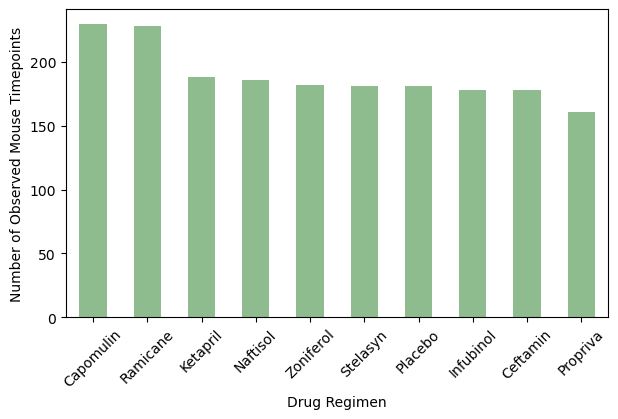

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_number = mouse_study['Drug Regimen'].value_counts()
drug_number.plot(kind='bar', figsize=(7,4), rot=45, color='#8FBC8F', alpha=1.00)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Display the plot
plt.show()

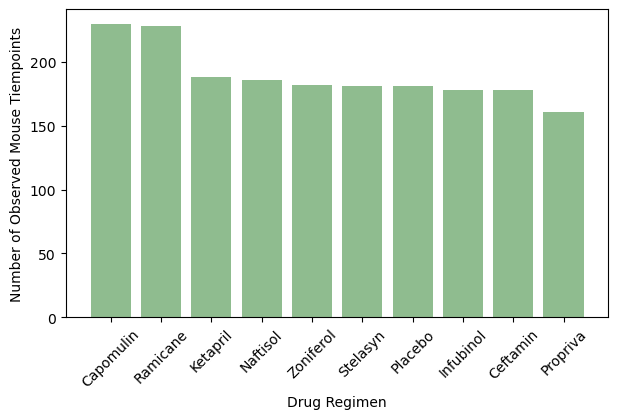

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = drug_number.index
counts = drug_number.values

# Plotting using pyplot
plt.figure(figsize = (7,4))
plt.bar(drug_regimens, counts, color = '#8FBC8F', alpha = 1.00)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Tiempoints') 

plt.xticks(rotation = 45)

# Display the plot
plt.show()
        

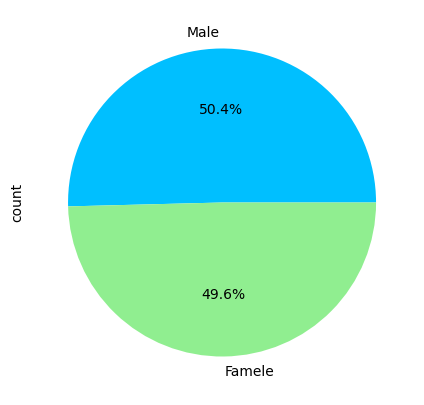

In [93]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_gender = mouse_no_duplicate.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart
mice_gender.plot(kind = 'pie', autopct = '%1.1f%%', figsize=(5,5), startangle = 0, labels = ['Male', 'Famele'], colors = ['#00BFFF', 'lightgreen'])

# Display the pie chart
plt.show()
                                                                                                                          

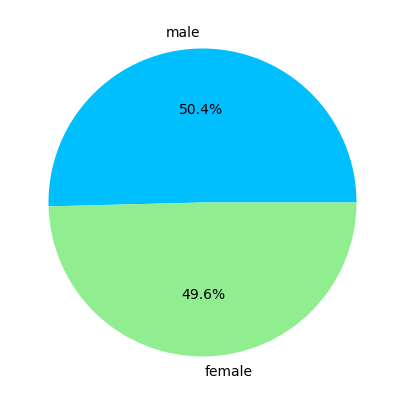

In [95]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
plt.figure(figsize=(5,5))
plt.pie(mice_gender, labels = ['male', 'female'], autopct = '%1.1f%%', startangle = 0, colors = ['#00BFFF', 'lightgreen'])

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = mouse_no_duplicate[mouse_no_duplicate["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, filtered_df, on = ["Mouse ID", "Timepoint"], how = "left")

# Display the data table
final_tumor_volume_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
5,a520,45,38.810366,1,Ramicane,Male,13,21
6,a577,30,57.031862,2,Infubinol,Female,6,25
7,a644,45,32.978522,1,Ramicane,Female,7,17
8,a685,45,66.083066,3,Infubinol,Male,8,30
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(treatment_data)

    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


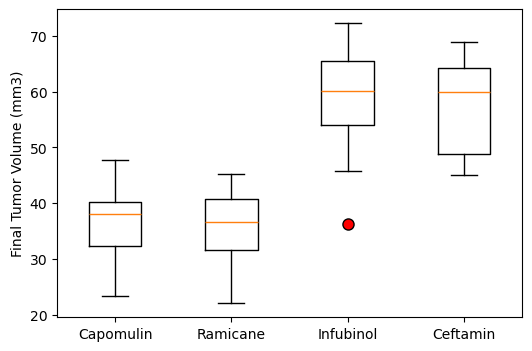

In [104]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(6, 4))
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data_plot = [final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in selected_regimens]
flierprops = dict(marker='o', markerfacecolor='red', markersize=8)
ax1.boxplot(data_plot, labels=selected_regimens, flierprops=flierprops)
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

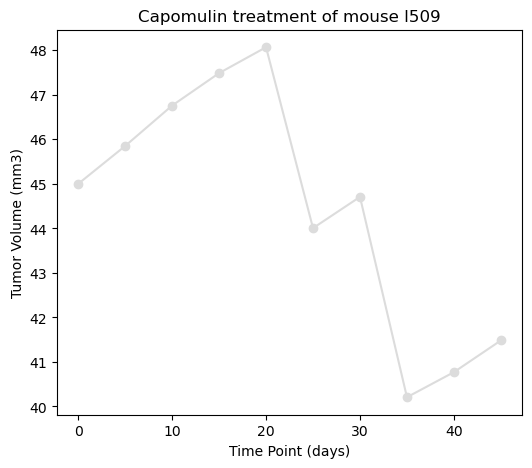

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = mouse_study[mouse_study["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
if not single_mouse_data.empty:
    plt.figure(figsize=(6,5))
    plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker = 'o', linestyle = '-', color='#DCDCDC')
    
    plt.title(f'Capomulin treatment of mouse l509')
    plt.xlabel('Time Point (days)')
    plt.ylabel('Tumor Volume (mm3)')

# Display the plot
    plt.show()

else:
    print(f"No data found for Mouse ID {mouse_id} treated with capomulin.")


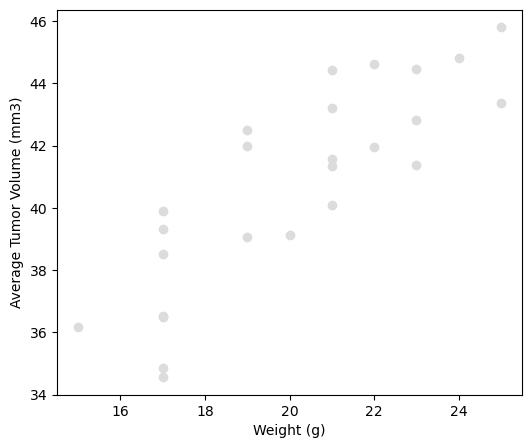

In [114]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby ("Mouse ID").agg({
    "Tumor Volume (mm3)": "mean",
    "Weight (g)": "mean"
}).reset_index()
plt.figure(figsize=(6,5))
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color='#DCDCDC', alpha=1.00)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

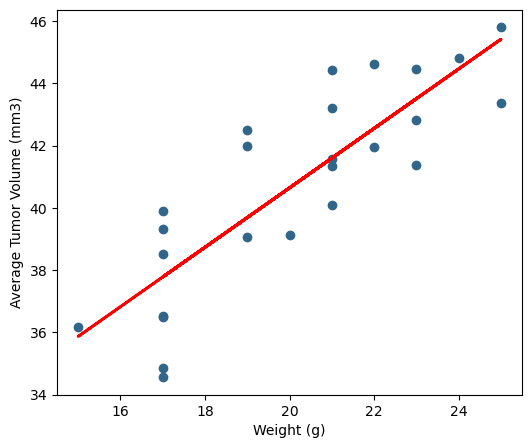

In [116]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
correlation_coefficient = correlation[0]
slope, intercept, r_value, p_value_regression, std_err = st.linregress(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
x_values = average_tumor_volume["Weight (g)"]
y_values = slope * x_values + intercept
plt.figure(figsize=(6, 5))
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color='#31668a', alpha=1.00, label='Observed Data')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()